<a href="https://colab.research.google.com/github/michelgoncalves/projects/blob/master/MAG_An%C3%A1lise_da_viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando a Violência no Rio de Janeiro
por Michel Antônio Gonçalves - https://linkedin.com/in/michel-antonio-goncalves

---
---



<img src="https://guardemais.com.br/wp-content/uploads/2018/11/rio-de-janeiro-cristo-redentor.jpg" width="640px">


É impossível abordar a cidade do Rio de Janeiro sem salientar seu status de uma das principais vitrines brasileiras aos olhos do mundo. Contudo, **apesar de suas belezas naturais que encantam turistas do mundo inteiro, além do protagonismo na cultura e economia nacional, lamentavelmente, a cidade do Rio de Janeiro ostenta um notório histórico de violência**, com alta atividade do crime organizado, bem como a ocorrência  diária de crimes oriundos da desigualdade social, corrupção e escassez de recursos para educação e desenvolvimento. 

Vale ressaltar que a criminalidade é um problema crônico em todo o Brasil, mas, dada sua notoriedade, a cidade maravilhosa tornou-se um microcosmo da relação do Brasil com a violência. Sendo assim, quanto mais analisarmos os dados e informações oriundos dessa complexa questão, maior será a compreensão do cenário regional e também nacional, maior também será o conjunto de análises, projetos e planos de ação focados na melhoria dessa realidade. 


  <img src="https://i0.wp.com/outraspalavras.net/terraemtranse/wp-content/uploads/2018/02/intervecao-rj.jpeg?w=780" width="640px">


## 1) Qual é o objetivo deste trabalho?

**O estudo utiliza de técnicas de *data science* para tornar mais claras as dimensões da base de dados da Polícia Militar do Rio de Janeiro sobre a violência, buscando dessa maneira:**

* Detalhar a maneira como a base foi categorizada e organizada;
* Destacar algumas das variáveis mais importantes, bem como relacioná-las entre si para alcançar *insights* relevantes;
* Apontar o percentual de valores ausentes para auxiliar no processo de limpeza dos dados; 
* Facilitar e agilizar subsequentes estudos em cima dessa mesma fonte de dados, encorajando a produção de análises mais precisas, eficientes e assertivas na construção de soluções e projetos focados em reverter, de forma positiva, os indicadores de violência do Rio e, consequentemente, do Brasil. 

---


## 2) De onde os dados se originam?

Os dados utilizados neste estudo são originários do **Instituto de Segurança Pública do Rio de Janeiro**, podendo ser acessados pelo site:  
http://www.ispdados.rj.gov.br/estatistica.html.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Particularmente, para essa análise, foi utilizado um arquivo `csv` cujo os dados da base citada foram pré-processados para facilitar o estudo. O  `csv` está disponível no seguinte endereço: 
https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv.

---


## 3) Como os dados foram importados?
Inicalmente, serão importadas as bibliotecas *Python* necessárias para o desenvolvimento da análise. Em seguida, o arquivo `csv` será importado para uma estrutura de *DataFrame* (df) a ser manipulada pela biblioteca *Pandas*.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv')

---

## 4) Qual é o tamanho da base de dados? 

Com a base de dados devidamente integrada em um *DataFrame*, levantaremos informações essenciais sobre o tamanho e estrutura do material analisado, algo que facilitará a compreensão dos dados, bem como a elaboração de soluções.


Tamanho do *DataFrame*: 
* **56** variáveis (colunas)
* **344** entradas (linhas)

In [0]:
df.shape

(344, 56)

In [0]:
#Identificação de todas as variáveis (colunas) do DataFrame
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

In [0]:
#Categoria dos dados de cada coluna (variável)
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

In [0]:
# 5 primeiras entradas do DataFrame
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [0]:
# 5 últimas entradas do DataFrame
df.tail()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
339,2019,4,360,1.0,11,124.0,466,5573,483.0,172.0,2182.0,502,124,3755,667,7031,1585,2,4.0,2424.0,10.0,82.0,23.0,2245,18454,1244,1519,607.0,1318.0,211.0,7633,12532,0.0,151.0,11.0,3260.0,1909,745.0,1021.0,187.0,2624,3128.0,497.0,1648.0,350.0,5310.0,408.0,22,3.0,1.0,0.0,496,11040,3755,67797.0,3
340,2019,5,345,2.0,15,172.0,478,4958,465.0,145.0,2304.0,514,93,3649,710,7332,1625,1,3.0,2427.0,9.0,87.0,7.0,2216,18673,1480,1475,715.0,1423.0,220.0,7711,13024,0.0,147.0,7.0,3498.0,2034,735.0,1133.0,199.0,2450,3169.0,527.0,1771.0,248.0,5068.0,390.0,20,1.0,0.0,0.0,534,11384,3649,68336.0,3
341,2019,6,332,3.0,8,153.0,436,4769,414.0,152.0,2481.0,382,85,3115,599,6077,1287,1,4.0,2187.0,19.0,83.0,9.0,1984,15832,1251,1443,630.0,1345.0,189.0,7224,12082,0.0,133.0,6.0,3029.0,1854,763.0,976.0,158.0,2041,2848.0,467.0,1585.0,233.0,4497.0,403.0,20,1.0,3.0,0.0,496,9551,3115,61202.0,3
342,2019,7,309,5.0,10,194.0,399,4740,402.0,140.0,2334.0,386,72,3198,691,6637,1208,1,0.0,2226.0,12.0,97.0,16.0,2110,16654,1353,1570,746.0,1391.0,230.0,7632,12922,0.0,135.0,12.0,3627.0,1861,709.0,996.0,187.0,2355,2907.0,490.0,1856.0,267.0,4678.0,400.0,32,7.0,0.0,0.0,518,10071,3198,65817.0,2
343,2019,8,318,1.0,6,170.0,457,4760,460.0,156.0,2437.0,433,103,3181,587,6452,1215,1,1.0,2245.0,9.0,98.0,17.0,1794,16136,1361,1568,674.0,1534.0,185.0,7280,12602,0.0,132.0,12.0,3546.0,1862,668.0,1067.0,171.0,2081,3114.0,476.0,2028.0,265.0,4662.0,367.0,27,8.0,2.0,0.0,495,9912,3181,65285.0,2


## 5) A base de dados possui valores ausentes?  

**Valores ausentes possuem o potencial de afetar a precisão de certas análises realizadas em uma base de dados.** Sendo assim, utilizaremos o *pandas* para identificar a quantidade de valores ausentes presentes nas entradas (linhas) e variáveis (colunas), facilitando o processo de limpeza de dados, bem como a eficiência de futuras análises. 

In [0]:
#Número de valores ausentes em cada variável do DataFrame
df.isnull().sum().sort_values(ascending=False)

roubo_bicicleta               276
furto_bicicleta               276
apreensao_drogas_sem_autor    180
posse_drogas                  180
apf                           180
aaapai                        180
cmp                           180
trafico_drogas                180
cmba                          180
sequestro_relampago           144
furto_coletivo                144
extorsao                      144
furto_celular                 144
roubo_apos_saque              144
roubo_conducao_saque          144
roubo_cx_eletronico           144
estupro                       144
estelionato                   144
pol_civis_mortos_serv         144
pol_militares_mortos_serv     144
pessoas_desaparecidas         132
encontro_ossada               132
roubo_celular                 108
lesao_corp_culposa             96
ameaca                         96
sequestro                      96
lesao_corp_morte               96
registro_ocorrencias           96
hom_por_interv_policial        84
hom_culposo   

In [0]:
#Porcentagem dos valores ausentes de cada variável do DataFrame
df.isnull().sum().sort_values(ascending=False) / df.shape[0]

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

*Variáveis de destaque com alta porcentagem de valores ausentes:*
* Roubo de bicicleta: **80,23%**            
* Posse de drogas: **52,32%**
* Tráfico de drogas: **52,32%**                
* Estupro: **41,86%**                     
* Policiais civis mortos em serviço: **41,86%**         
* Policiais militares mortos em serviço: **41,86%**    
              



---

## 6) Que tipo de informações sobre a violência no Rio de Janeiro podemos extrair dessa base de dados?
A seguir, será exposta a estrutura do *DataFrame*, permitindo a melhor compreensão de como as informações estão estruturadas. Com base nessa estruturação, apresentaremos algumas informações segmentadas sobre a violência no Rio de Janeiro. 


**Resumo estatístico do *DataFrame***

In [0]:
#Resumo estatístico do DataFrame
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

**Algumas informações extraídas do *DataFrame***

In [0]:
print("Média do roubo de veículos por ano no RJ:\t{}".format(df.roubo_veiculo.mean()))

print("Média de furto de veículos por ano no RJ:\t{}".format(df.furto_veiculos.mean()))

print("Média de veículos recuperados por ano no RJ:\t{}".format(df.recuperacao_veiculos.mean()))

Média do roubo de veículos por ano no RJ:	2448.6976744186045
Média de furto de veículos por ano no RJ:	1674.671511627907
Média de veículos recuperados por ano no RJ:	1772.2383720930231


Com essas informações levantadas, podemos calcular a porcentagem de veículos recuperados por meio da seguinte fórmula:

$\frac{\text{recuperacao_veiculos}}{\text{roubo_veiculo} + \text{furto_veiculos}}$



In [0]:
df_carros_recuperados = df.recuperacao_veiculos.mean() / (df.roubo_veiculo.mean() + df.furto_veiculos.mean())

df_carros_recuperados

0.42980346705075084

In [0]:
round(df_carros_recuperados, 2)

0.43

In [0]:
print("Valor máximo de homicídios dolosos:\t{}".format(df.hom_doloso.max()))

print("Valor mínimo de homicídios dolosos:\t{}".format(df.hom_doloso.min()))

Valor máximo de homicídios dolosos:	831
Valor mínimo de homicídios dolosos:	272



<img src="https://ichef.bbci.co.uk/news/660/cpsprodpb/4710/production/_107129181_cartheqft.jpg" width="640px">


### Dos veículos roubados/furtados no Rio de Janeiro, **43% são recuperados**.



---

## 7) Posso extrair *insights* importantes dessa base de dados por meio de visualizações?

A seguir, algumas análises no *DataFrame* serão representadas graficamente para facilitar a interpretação, compreensão e levantamento de *insights*. 

**Primeiramente, exibiremos um histograma analisando a distribuição da média dos homicídios dolosos (`hom_doloso`) ocorridos no Rio de Janeiro.**




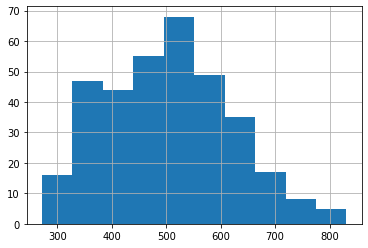

In [0]:
df.hom_doloso.hist();

In [0]:
df.hom_doloso.describe()

count    344.000000
mean     504.555233
std      113.774481
min      272.000000
25%      413.750000
50%      507.000000
75%      577.250000
max      831.000000
Name: hom_doloso, dtype: float64

In [0]:
print("Média de homicídios dolosos:\t{}".format(df.hom_doloso.mean()))

print("Mediana de homicídios dolosos:\t{}".format(df.hom_doloso.median()))

Média de homicídios dolosos:	504.55523255813955
Mediana de homicídios dolosos:	507.0


*Observações:*
* De acordo com o histograma, os dados estão distribuídos próximos a média, demonstrando que não há significativa pulverização de dados e *outliers* expressivos, algo reforçado pela proximidade do valor da média (*mean*) e mediana (*median*).

**Abaixo, será plotado um gráfico de linha representando a evolução de roubos em transportes coletivos (`roubo_em_coletivo`) ocorridos no RJ.**

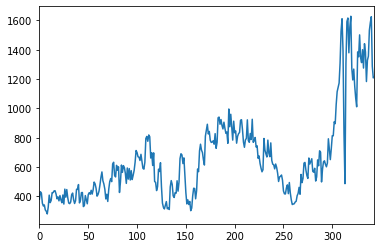

In [0]:
df.roubo_em_coletivo.plot();

*Observações:*
* Apesar de apresentar algumas oscilações, o gráfico representando a evolução de roubos em coletivos no RJ apresenta uma tendência de crescimento que se intensifica nos registros mais recentes, demonstrando um expressivo aumento das ocorrências.

**Por fim, aplicaremos um mapa de calor (*heatmap*), demonstrando a correlação do crescimento de alguns tipos de crimes graves ocorridos no Rio de Janeiro conforme a passagem dos anos, da década de 90 até o ano de 2019 (`vano`)**

In [0]:
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

In [0]:
corr = df[['vano', 'hom_doloso', 'latrocinio', 'trafico_drogas', 'hom_culposo']].corr()

display(corr)

,vano,hom_doloso,latrocinio,trafico_drogas,hom_culposo
vano,1.000000,-0.787954,-0.193495,0.903709,-0.729137
hom_doloso,-0.787954,1.000000,0.350517,-0.516782,0.321079
latrocinio,-0.193495,0.350517,1.000000,-0.191288,-0.043662
trafico_drogas,0.903709,-0.516782,-0.191288,1.000000,-0.725671
hom_culposo,-0.729137,0.321079,-0.043662,-0.725671,1.000000


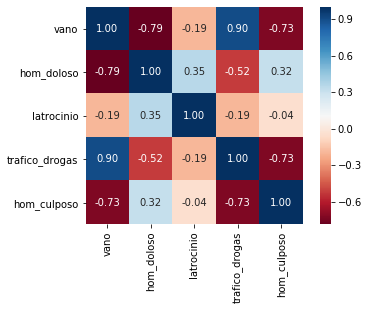

In [0]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

*Observações:*
* Sem dúvida, a correlação mais expressiva está entre o crescimento do tráfico de drogas conforme a passagem dos anos, uma vez que o índice de **0.903709** é indicativo de uma forte correlação.

---

## 8) Conclusão
* A base de dados possui uma quantidade considerável de dados ausentes em variáveis importantes. Recomenda-se realizar preenchimento dos campos ausentes pelos valores mais frequentes.

* Conforme o exemplo da relação entre veículos roubados e veículos recuperados, bem como a forte correlção entre a evoluçao do tráfico de drogas conforme a passagem dos anos, variáveis dessa base de dados podem ser relacionadas, resultando em *insights* e informações importantes.

